## Table of Contents

- [Clean Data](#cleandata)
- [Exploratory Analysis](#exploratoryanalysis)
    - [What are the most common category youtube videos?](#exploratoryanalysis1)
    - [How long do videos trend?](#exploratoryanalysis2)
    - [Channels that got listed in trending videos the most?](#exploratoryanalysis3)
    - [Pairplot of numeric variables](#exploratoryanalysis4)
    - [Are there any common tags/themes to videos?](#exploratoryanalysis5)
    - [Are youtube video titles generally positive or negative sentiment?](#exploratoryanalysis6)
    - [Does attributes of video titles and tags affect views?](#exploratoryanalysis7)

In [1]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import classification_report
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#run once to start path at the directory above
#os.chdir('..')


## Clean Data <a class="anchor" id="cleandata"></a>

- Convert columns to the appropriate data types (ie., dates) 
- Get category titles from the `US_category_id.json` file
- Add variables for time trending and number of tags

In [132]:
ytdata = pd.read_csv('Data/US_youtube_trending_data.csv')

In [133]:
ytdata.head(10)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...
5,w-aidBdvZo8,I Haven't Been Honest About My Injury.. Here's...,2020-08-11T20:00:04Z,UC5zJwsFtEs9WYe3A76p7xIA,Professor Live,24,2020-08-12T00:00:00Z,Professor injury|professor achilles|professor ...,949491,77487,746,7506,https://i.ytimg.com/vi/w-aidBdvZo8/default.jpg,False,False,Subscribe To My Channel - https://www.youtube....
6,uet14uf9NsE,OUR FIRST FAMILY INTRO!!,2020-08-12T00:17:41Z,UCDSJCBYqL7VQrlXfhr1RtwA,Les Do Makeup,26,2020-08-12T00:00:00Z,[None],470446,47990,440,4558,https://i.ytimg.com/vi/uet14uf9NsE/default.jpg,False,False,Hi babygirls! Thank you so much for watching ...
7,ua4QMFQATco,CGP Grey was WRONG,2020-08-11T17:15:11Z,UC2C_jShtL725hvbm1arSV9w,CGP Grey,27,2020-08-12T00:00:00Z,cgpgrey|education|hello internet,1050143,89190,854,6455,https://i.ytimg.com/vi/ua4QMFQATco/default.jpg,False,False,‣ What Was TEKOI: https://www.youtube.com/watc...
8,SnsPZj91R7E,SURPRISING MY DAD WITH HIS DREAM TRUCK!! | Lou...,2020-08-10T22:26:59Z,UCZDdF_p-L88NWVpzF0vjvMQ,Louie's Life,24,2020-08-12T00:00:00Z,surprising|dad|father|papa|with|dream|car|truc...,1402687,95694,2158,6613,https://i.ytimg.com/vi/SnsPZj91R7E/default.jpg,False,False,"Since I was little, i've had these goals for m..."
9,SsWHMAhshPQ,Ovi x Natanael Cano x Aleman x Big Soto - Veng...,2020-08-11T23:00:10Z,UC648rgJOboZlgcDbW00vTSA,Rancho Humilde,10,2020-08-12T00:00:00Z,Vengo De Nada|Aleman|Ovi|Big Soto|Trap|Ovi Nat...,741028,113983,4373,5618,https://i.ytimg.com/vi/SsWHMAhshPQ/default.jpg,False,False,Vengo De Nada - Ovi x Natanael Cano x Aleman x...


In [134]:
ytdata.shape

(96591, 16)

In [135]:
#thumbnail link is probably not relevant
ytdata_subset = ytdata.drop(labels = ['thumbnail_link'], axis =1 )

In [136]:
#convert the data time columns to appropriate data types
ytdata_subset['publishedAt'] = pd.to_datetime(ytdata_subset['publishedAt'], format = "%Y-%m-%d %H:%M:%S")
ytdata_subset['trending_date'] = pd.to_datetime(ytdata_subset['trending_date'], format = "%Y-%m-%d %H:%M:%S")

In [137]:
#read in json for category IDs & create a dataframe to add the category titles to the dataset
file = open('data/US_category_id.json')
categories = json.load(file)

#read in the IDs and category titles
ids = [int(categories['items'][i]['id']) for i in range(0, len(categories['items']))]
category = [categories['items'][i]['snippet']['title'] for i in range(0, len(categories['items']))]

#create pandas dataframe
category_dataset = pd.DataFrame(data = {'categoryId': ids, 
                                        'categoryTitle': category})


In [138]:
#join the category_dataset with ytdata_subset
joined = pd.merge(left = ytdata_subset, right = category_dataset, how = 'left', on = 'categoryId')


In [139]:
joined.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,categoryTitle
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12 00:00:00+00:00,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12 00:00:00+00:00,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,False,False,"While running her own modding shop, Ramya Pare...",Gaming
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12 00:00:00+00:00,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,False,False,I left youtube for a month and this is what ha...,Entertainment
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12 00:00:00+00:00,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,Music
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12 00:00:00+00:00,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,False,False,Transforming The LaBrant Family's empty white ...,Howto & Style


In [140]:
#difference in time between trending data and publish data
joined['trending_hours'] = (joined['trending_date'] - joined['publishedAt'])
joined['trending_hours'] = joined['trending_hours'].apply(lambda x: x.seconds/3600 + 24*x.days)

In [141]:
#make a variable for the number of tags
joined['num_tags'] = [joined['tags'][i].count('|') + 1for i in range(0,len(joined['tags']))]

In [142]:
joined.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,categoryTitle,trending_hours,num_tags
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12 00:00:00+00:00,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs,4.662778,15
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12 00:00:00+00:00,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,False,False,"While running her own modding shop, Ramya Pare...",Gaming,6.997222,25
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12 00:00:00+00:00,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,False,False,I left youtube for a month and this is what ha...,Entertainment,7.431667,30
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12 00:00:00+00:00,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,Music,7.351389,23
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12 00:00:00+00:00,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,False,False,Transforming The LaBrant Family's empty white ...,Howto & Style,8.831944,33


In [59]:
#number of video_ids
joined[['video_id']].drop_duplicates().shape

(17081, 1)

In [61]:
joined.describe()

,categoryId,view_count,likes,dislikes,comment_count,trending_hours,num_tags
count,96591.000000,9.659100e+04,9.659100e+04,96591.000000,9.659100e+04,96591.000000,96591.000000
mean,18.736746,2.800587e+06,1.527580e+05,3112.863207,1.378066e+04,82.407740,16.901212
std,6.856742,7.361064e+06,4.370311e+05,13168.861573,9.680506e+04,56.014979,12.494634
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,-14.002778,1.000000
25%,17.000000,5.355225e+05,2.154750e+04,370.000000,1.701000e+03,42.997222,6.000000
50%,20.000000,1.109173e+06,5.200100e+04,854.000000,3.873000e+03,78.715833,16.000000
75%,24.000000,2.499352e+06,1.323280e+05,2238.000000,9.327000e+03,117.849861,26.000000
max,29.000000,2.644074e+08,1.602153e+07,879354.000000,6.738537e+06,866.885278,74.000000


In [62]:
joined.sort_values(by = 'publishedAt').head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,categoryTitle,trending_hours,num_tags
94,JXzk8G9aXI8,Avatar Intro but with Animals,2020-08-03 21:51:14+00:00,UCa0LID3WQdj-bd5KiI-34vw,BLTW,27,2020-08-12 00:00:00+00:00,avatar|avatar the last airbender|avatar meme|a...,1048314,51361,891,965,False,False,"Long ago ⏱, the four4️⃣ pets🐶 lived together i...",Education,194.146111,4
313,JXzk8G9aXI8,Avatar Intro but with Animals,2020-08-03 21:51:14+00:00,UCa0LID3WQdj-bd5KiI-34vw,BLTW,27,2020-08-13 00:00:00+00:00,avatar|avatar the last airbender|avatar meme|a...,1686474,76387,1384,1313,False,False,"Long ago ⏱, the four4️⃣ pets🐶 lived together i...",Education,218.146111,4
757,JXzk8G9aXI8,Avatar Intro but with Animals,2020-08-03 21:51:14+00:00,UCa0LID3WQdj-bd5KiI-34vw,BLTW,27,2020-08-15 00:00:00+00:00,avatar|avatar the last airbender|avatar meme|a...,3146234,123862,2410,1865,False,False,"Long ago ⏱, the four4️⃣ pets🐶 lived together i...",Education,266.146111,4
536,JXzk8G9aXI8,Avatar Intro but with Animals,2020-08-03 21:51:14+00:00,UCa0LID3WQdj-bd5KiI-34vw,BLTW,27,2020-08-14 00:00:00+00:00,avatar|avatar the last airbender|avatar meme|a...,2376265,100124,1834,1592,False,False,"Long ago ⏱, the four4️⃣ pets🐶 lived together i...",Education,242.146111,4
183,3bC2T0oFwoo,This is Goodbye,2020-08-05 19:00:01+00:00,UCIcgBZ9hEJxHv6r_jDYOMqg,Unus Annus,23,2020-08-12 00:00:00+00:00,unus annus|markiplier|crankgameplays|memento m...,4971181,360168,7850,48742,False,False,Only 100 days left. Will you make the most of ...,Comedy,148.999722,5


In [63]:
joined.sort_values(by = 'publishedAt').tail()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,categoryTitle,trending_hours,num_tags
96437,cTYnv8G9yM4,We need to have a serious talk...,2021-12-01 17:16:40+00:00,UCkWQ0gDrqOCarmUKmppD7GQ,JayzTwoCents,28,2021-12-02 00:00:00+00:00,[None],346840,42110,1904,20517,False,False,"As we get ready to head into 2022, we REALLY n...",Science & Technology,6.722222,1
96397,u1ErZ2gn6BM,I finally tried the SNIPER META in Rainbow Six...,2021-12-01 18:55:59+00:00,UC4l5F42_z5f3Wav_42g9pnA,Marley,20,2021-12-02 00:00:00+00:00,marley|marley yt|marley rainbow six siege|rain...,480639,29499,246,2761,False,False,"It's a new Rainbow Six Siege season, and a new...",Gaming,5.066944,36
96399,f0tZYHUimV0,My Neighbor Can NEVER Stop Bragging😩 (Ring Doo...,2021-12-01 19:00:15+00:00,UCGI2dNOEAIk6v31rnxGiSRA,Jakesterguy,23,2021-12-02 00:00:00+00:00,[None],862922,67201,1558,871,False,False,NaN,Comedy,4.995833,1
96391,_0MXhG1shEc,Minecraft Speedrunner VS 5 Hunters FINALE REMATCH,2021-12-01 21:00:13+00:00,UCTkXRDQl0luXxVQrRQvWS6w,Dream,20,2021-12-02 00:00:00+00:00,Dream Minecraft|dream Minecraft youtube|minecr...,5637905,813288,8930,55329,False,False,Minecraft Speedrunner VS 5 Hunters FINALE REMA...,Gaming,2.996389,24
96392,Dn6u3SdgGKI,Dream - Minecraft Manhunt Extra Scenes (5 Hunt...,2021-12-01 21:39:09+00:00,UChU3JRloULzdFX3aCu7BiSA,DreamXD,22,2021-12-02 00:00:00+00:00,[None],905060,110612,627,6550,False,False,This is extra scenes from Dream's channel of t...,People & Blogs,2.347500,1


In [143]:
joined.to_pickle('analysis/intermediary_data/joined.pkl')

In [2]:
joined = pd.read_pickle('analysis/intermediary_data/joined.pkl')

## Exploratory Analysis <a class="anchor" id="exploratoryanalysis"></a>


The purpose of this analysis is to try to characterize Youtube trending videos. 

### What are the most common category youtube videos? <a class="anchor" id="exploratoryanalysis1"></a>

In [5]:
num_categories = joined['categoryTitle'].value_counts()

In [6]:
num_categories

Entertainment            19419
Music                    17595
Gaming                   16643
Sports                   10550
People & Blogs            8347
Comedy                    5330
Film & Animation          3703
News & Politics           3504
Science & Technology      3465
Howto & Style             3146
Education                 2141
Autos & Vehicles          1741
Pets & Animals             515
Travel & Events            404
Nonprofits & Activism       88
Name: categoryTitle, dtype: int64

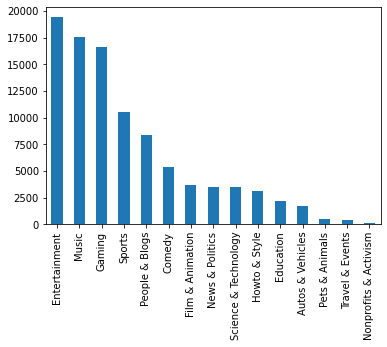

In [11]:
num_categories.plot(kind = 'bar');

See if view counts are highest for the most common categories

In [109]:
joined.groupby('categoryTitle').aggregate(func = 'mean').sort_values(by = 'view_count', ascending = False)

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,time_to_trend,num_tags
categoryTitle,,,,,,,,,
Music,10.0,4.705054e+06,321226.779824,5988.137312,37428.709463,0.002273,0.002899,11.835696,18.022904
Entertainment,24.0,3.319318e+06,169192.567125,3170.746434,11383.168649,0.019105,0.002729,9.193427,17.195273
Science & Technology,28.0,2.765295e+06,116277.254545,2664.239538,7176.728139,0.084271,0.007792,8.995907,16.006349
Gaming,20.0,2.261046e+06,124322.931142,2266.255483,10064.394100,0.009433,0.005047,8.916141,16.351379
People & Blogs,22.0,2.238094e+06,129657.891937,3648.257937,8967.942734,0.026596,0.012340,8.374275,13.656883
Film & Animation,1.0,2.171767e+06,99248.681069,1765.970294,8191.908453,0.009722,0.007831,8.664169,15.270591
Sports,17.0,2.070612e+06,51693.909953,1486.464265,4388.168815,0.004171,0.006540,11.395851,21.055355
Comedy,23.0,1.932506e+06,131531.432083,2039.972983,7434.540338,0.000938,0.000750,7.979457,16.261726
News & Politics,25.0,1.737711e+06,22707.810217,2840.804795,6360.397546,0.097032,0.014269,11.094328,12.986872


In [110]:
joined.groupby('categoryTitle').aggregate(func = 'median').sort_values(by = 'view_count', ascending = False)

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,time_to_trend,num_tags
categoryTitle,,,,,,,,,
Music,10.0,1548143.0,96996.0,1328.0,6323.0,0.0,0.0,8.997222,17.0
Gaming,20.0,1181078.0,58023.0,1009.0,4224.0,0.0,0.0,7.992500,17.0
Science & Technology,28.0,1167604.0,52230.0,1000.0,3265.0,0.0,0.0,7.993611,14.0
Entertainment,24.0,1163408.0,55152.0,882.0,3552.0,0.0,0.0,7.498889,17.0
Film & Animation,1.0,1115740.0,61414.0,809.0,4460.0,0.0,0.0,7.816667,14.0
People & Blogs,22.0,1111011.0,63682.0,918.0,3788.0,0.0,0.0,6.497222,10.0
Education,27.0,1004695.0,60935.0,776.0,4367.0,0.0,0.0,8.991944,12.0
Sports,17.0,985887.5,15658.5,495.5,2409.0,0.0,0.0,9.010278,21.0
Comedy,23.0,962846.5,69745.0,659.0,4299.5,0.0,0.0,6.661667,14.0


In [111]:
joined[['categoryTitle', 'view_count']].groupby('categoryTitle').aggregate(func = 'max').sort_values(by = 'view_count', ascending = False)

,view_count
categoryTitle,
Music,264407389
Entertainment,206202284
Sports,103564168
Howto & Style,89075984
Comedy,87284105
People & Blogs,84063330
Science & Technology,77745621
Gaming,73728043
Education,55299186


### How long do videos trend? <a class="anchor" id="exploratoryanalysis2"></a>

In [164]:
num_days = joined[['video_id', 'trending_date']].groupby('video_id').aggregate(func = 'count').sort_values(by='trending_date', ascending = False).reset_index()
num_days.head(10)



,video_id,trending_date
0,hdmx71UjBXs,36
1,aONT7atzqfw,35
2,mcUpeaSX8BE,34
3,wY6UyatwVTA,34
4,vrRfBmMWpLY,33
5,nLxmuh6wCVY,31
6,pvPsJFRGleA,27
7,rt-2cxAiPJk,24
8,1Lh1XaLaBHQ,24
9,CZJvBfoHDk0,24


In [211]:
num_days.rename(columns = {"video_id": "video_id",
                 "trending_date":"Number of Days"}, inplace = True)

<AxesSubplot:ylabel='Frequency'>

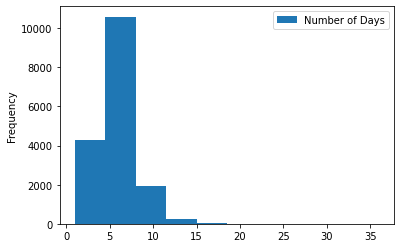

In [212]:
num_days.plot(kind = 'hist')

<AxesSubplot:xlabel='trending_hours', ylabel='view_count'>

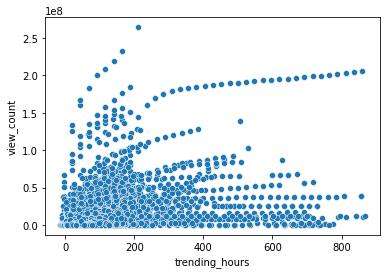

In [46]:
trend_views = joined[['trending_hours', 'view_count', 'video_id']]

sns.scatterplot(data = trend_views, x = 'trending_hours', y = 'view_count')

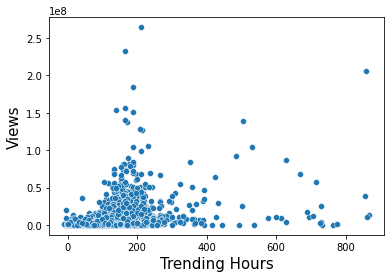

In [52]:
max_views_hours = trend_views.groupby('video_id').aggregate(func = max)

p1 = sns.scatterplot(data = max_views_hours, x = 'trending_hours', y = 'view_count');
p1.set_xlabel("Trending Hours", fontsize = 15);
p1.set_ylabel("Views", fontsize = 15);

In [179]:
joined[joined.video_id.isin(num_days['video_id'][0:10])].reset_index().drop_duplicates(subset = ['video_id', 'title', 'channelTitle']).reset_index()

,level_0,index,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,categoryTitle,trending_hours,num_tags
0,0,7401,pvPsJFRGleA,Justin Bieber - Holy ft. Chance The Rapper,2020-09-18 04:00:10+00:00,UCHkj014U2CQ2Nv0UZeYpE_A,JustinBieberVEVO,10,2020-09-18 00:00:00+00:00,Justin|Bieber|Holy|RBMG/Def|Jam|Pop,6217404,936304,13331,91366,False,False,Holy out now: https://JustinBieber.lnk.to/Holy...,Music,-4.002778,6
1,27,31201,wY6UyatwVTA,"India claim stunning series win, end Australia...",2021-01-19 08:21:09+00:00,UCkBY0aHJP9BwjZLDYxAQrKg,cricket.com.au,17,2021-01-19 00:00:00+00:00,Australia|India|day five|fourth Test|Gabba|hig...,13516854,492839,8512,35888,False,False,Rishabh Pant was the hero as an injury-ravaged...,Sports,-8.352500,9
2,61,53808,mcUpeaSX8BE,Israeli Iron Dome filmed intercepting rockets ...,2021-05-11 14:07:14+00:00,UCPgLNge0xqQHWM5B5EFH9Cg,The Telegraph,25,2021-05-12 00:00:00+00:00,Telegraph|News|Israel|Iron Dome|Hamas|Gaza|Pal...,1997878,27833,4333,0,True,False,Sirens blared in the coastal Israeli city of A...,News & Politics,9.879444,7
3,87,59591,aONT7atzqfw,Floyd Mayweather vs Logan Paul: Fight goes the...,2021-06-07 05:40:56+00:00,UCja8sZ2T4ylIqjggA1Zuukg,CBS Sports HQ,17,2021-06-08 00:00:00+00:00,CBS|CBS Sports|sports|cbs sports hq|sports hq|...,10987189,112222,14073,20428,False,False,Watch the highlight from the Mayweather-Paul b...,Sports,18.317778,24
4,95,60392,CZJvBfoHDk0,Golden Buzzer: Nightbirde's Original Song Make...,2021-06-09 02:01:09+00:00,UCT2X19JJaJGUN7mrYuImANQ,America's Got Talent,24,2021-06-10 00:00:00+00:00,Simon Cowell|Howie Mandel|Terry Crews|America'...,4021571,153813,1249,13865,False,False,Simon Cowell gives Nightbirde the Golden Buzze...,Entertainment,21.980833,27
5,151,66405,hdmx71UjBXs,Turn into orbeez - Tutorial #Shorts,2021-07-03 04:04:57+00:00,UCt8z2S30Wl-GQEluFVM8NUw,Fortnite Fun TV,24,2021-07-04 00:00:00+00:00,[None],4473783,190996,11442,120,False,False,Turn into orbeez - Tutorial #ShortsHey guys! W...,Entertainment,19.917500,1
6,158,67211,vrRfBmMWpLY,Golden Buzzer: 9-Year-Old Victory Brinker Make...,2021-07-07 01:58:39+00:00,UCT2X19JJaJGUN7mrYuImANQ,America's Got Talent,24,2021-07-08 00:00:00+00:00,TV Series|Hilarious Music Songs|Highlights|Sim...,4271852,96708,2700,7159,False,False,"For the first time EVER, the judges and host a...",Entertainment,22.022500,28
7,169,68456,hdmx71UjBXs,Turn into orbeez - Tutorial #Shorts,2021-07-03 04:04:57+00:00,UCt8z2S30Wl-GQEluFVM8NUw,FFUNTV,24,2021-07-14 00:00:00+00:00,[None],169626488,5706748,169851,2194,False,False,Turn into orbeez - Tutorial #ShortsHey guys! W...,Entertainment,259.917500,1
8,223,76791,rt-2cxAiPJk,SPIDER-MAN: NO WAY HOME - Official Teaser Trai...,2021-08-24 01:40:05+00:00,UCz97F7dMxBNOfGYu3rx8aCw,Sony Pictures Entertainment,24,2021-08-25 00:00:00+00:00,spiderman|spiderman no way home|spider-man|spi...,41424503,2129390,10895,136941,False,False,What just happened? Watch the official teaser ...,Entertainment,22.331944,23
9,247,83393,1Lh1XaLaBHQ,FIGHT HIGHLIGHTS | Anthony Joshua vs. Oleksand...,2021-09-26 10:00:02+00:00,UCurvRE5fGcdUgCYWgh-BDsg,DAZN Boxing,17,2021-09-27 00:00:00+00:00,dazn|boxing|highlights|full fight|ko|knockout|...,2831370,44312,1903,7221,False,False,"September 25th, 2021 -- Anthony Joshua vs. Ole...",Sports,13.999444,12


In [181]:
num_days_over_14 = num_days[num_days['trending_date'] > 14]
num_days_over_14.shape

(38, 2)

In [194]:
num_days_over_14.head()

,video_id,trending_date
0,hdmx71UjBXs,36
1,aONT7atzqfw,35
2,mcUpeaSX8BE,34
3,wY6UyatwVTA,34
4,vrRfBmMWpLY,33


In [185]:
trending_info = pd.merge(left = num_days_over_14, right = joined, on = 'video_id', how = 'left').drop_duplicates(subset = ['video_id', 'title', 'channelTitle']).reset_index()

In [188]:
for title in trending_info['title']:
    print(title)

Turn into orbeez - Tutorial #Shorts
Turn into orbeez - Tutorial #Shorts
Floyd Mayweather vs Logan Paul: Fight goes the distance [Highlights, recap] | CBS Sports HQ
Israeli Iron Dome filmed intercepting rockets from Gaza
India claim stunning series win, end Australia's Gabba streak | Vodafone Test Series 2020-21
Golden Buzzer: 9-Year-Old Victory Brinker Makes AGT HISTORY! - America's Got Talent 2021
Highlights: Manchester United 0-5 Liverpool | Salah hat-trick stuns Old Trafford
Justin Bieber - Holy ft. Chance The Rapper
SPIDER-MAN: NO WAY HOME - Official Teaser Trailer (HD)
FIGHT HIGHLIGHTS | Anthony Joshua vs. Oleksandr Usyk
Golden Buzzer: Nightbirde's Original Song Makes Simon Cowell Emotional - America's Got Talent 2021
Inside the Taliban's Takeover of Afghanistan
Golden Buzzer: Jimmie Herrod Surprises the Judges With Tomorrow - America's Got Talent 2021
Dice Stacks from $1 to $100
My hidden talent #shorts
Golden Buzzer: Léa Kyle Performs Stunning Quick-Change Act - America's Got Ta

### Channels that got listed in trending videos the most? <a class="anchor" id="exploratoryanalysis3"></a>

In [203]:
joined.drop_duplicates(subset = ['title', 'channelTitle']).value_counts(subset = 'channelTitle').head(20)

channelTitle
NBA                                     166
NFL                                     162
SSundee                                  82
SSSniperWolf                             72
NBC Sports                               70
ESPN                                     65
MrBeast Gaming                           61
Saturday Night Live                      53
Veritasium                               51
MrBeast                                  48
Fortnite                                 45
Champions League on CBS Sports           44
Dude Perfect                             44
UFC - Ultimate Fighting Championship     43
ZHC                                      43
ESPN FC                                  40
beIN SPORTS USA                          40
BLACKPINK                                39
The Game Theorists                       38
Skip and Shannon: UNDISPUTED             38
dtype: int64

In [ ]:
joined.drop_duplicates(subset = ['title', 'channelTitle']).value_counts

### Pairplot of numeric variables: <a class="anchor" id="exploratoryanalysis4"></a> 

In [146]:
numeric_vars = joined.select_dtypes(include = ['int64', 'float64'])
numeric_vars = numeric_vars.drop('categoryId', axis = 1) 

In [147]:
numeric_vars.head()

,view_count,likes,dislikes,comment_count,trending_hours,num_tags
0,1514614,156908,5855,35313,4.662778,15
1,2381688,146739,2794,16549,6.997222,25
2,2038853,353787,2628,40221,7.431667,30
3,496771,23251,1856,7647,7.351389,23
4,1123889,45802,964,2196,8.831944,33


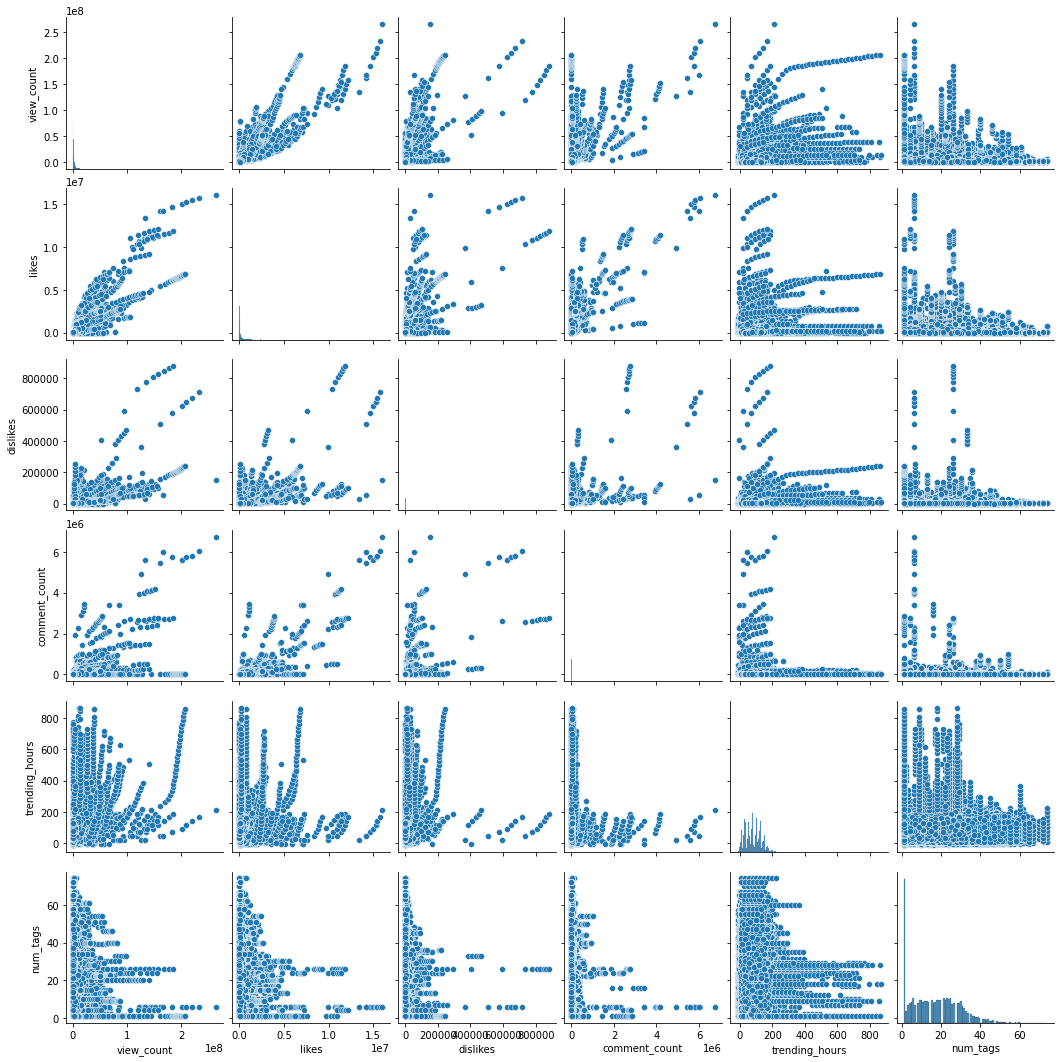

In [148]:
sns.pairplot(numeric_vars)

Observations: 
- Tranding hours, Likes, dislikes, comments and view counts all seem to increase with each other. 
- The number of tags may be negatively correlated with the view count, likes, but that may be in the noise 


### Are there any common tags/themes to the videos? <a class="anchor" id="exploratoryanalysis5"></a>

In [3]:
# First look at tags and focust on entertainment 
entertainment = joined[joined.categoryTitle == "Entertainment"].reset_index()

In [4]:
entertainment.head()

,index,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,categoryTitle,trending_hours,num_tags
0,2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12 00:00:00+00:00,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,False,False,I left youtube for a month and this is what ha...,Entertainment,7.431667,30
1,5,w-aidBdvZo8,I Haven't Been Honest About My Injury.. Here's...,2020-08-11 20:00:04+00:00,UC5zJwsFtEs9WYe3A76p7xIA,Professor Live,24,2020-08-12 00:00:00+00:00,Professor injury|professor achilles|professor ...,949491,77487,746,7506,False,False,Subscribe To My Channel - https://www.youtube....,Entertainment,3.998889,6
2,8,SnsPZj91R7E,SURPRISING MY DAD WITH HIS DREAM TRUCK!! | Lou...,2020-08-10 22:26:59+00:00,UCZDdF_p-L88NWVpzF0vjvMQ,Louie's Life,24,2020-08-12 00:00:00+00:00,surprising|dad|father|papa|with|dream|car|truc...,1402687,95694,2158,6613,False,False,"Since I was little, i've had these goals for m...",Entertainment,25.550278,44
3,16,6TIsR_7nrNc,Kylie Jenner Reacts To 'WAP' Music Video Backlash,2020-08-10 18:41:19+00:00,UC2rJLq19N0dGrxfib80M_fg,HollywoodLife,24,2020-08-12 00:00:00+00:00,kylie jenner|kendall jenner|cardi b|wap|reacts...,1007540,10102,7932,2763,False,False,Kylie Jenner dissed over cameo in Cardi B and ...,Entertainment,29.311389,9
4,22,FopIxceEr8g,EXTREME Game of Hide and Seek in my NEW HOUSE!!,2020-08-10 17:09:53+00:00,UCilwZiBBfI9X6yiZRzWty8Q,FaZe Rug,24,2020-08-12 00:00:00+00:00,faze rug|rug|rugfaze|fazerug|hide n seek|hide ...,3061467,206840,2646,14934,False,False,THIS WAS SO MUCH FUNWe played hide n seek for ...,Entertainment,30.835278,16


In [5]:
entertainment.shape

(19419, 19)

In [6]:
#create a dictionary with counts of unique tags
d = {}
for i in range(0, entertainment.shape[0]):
    tags = entertainment['tags'][i].split('|')
    for elem in tags: 
        if elem in d: 
            d[elem] += 1
        else: 
            d[elem] = 1

In [7]:
tag_count = pd.DataFrame.from_dict(d, orient = 'index', columns = ['count']).sort_values(by = 'count', ascending = False)

In [8]:
tag_count.shape

(26464, 1)

In [11]:
tag_count.head(25)

,count
[None],3117
funny,1994
comedy,1188
reaction,805
vlog,764
challenge,646
reacting,527
sssniperwolf,498
sniper wolf,498
trailer,495


Observations: 
- Looks like things related to being funny have the most tags
- vlogs, Marvel, Tiktok and How-to tags also seem to be up at the top

In [34]:
# try creating a word cloud of the most common tags
# create one string with the 100 most common tags 

string = ''

for i in range(1, 100): 
    addition = tag_count.index[i] + ' '
    string += addition * tag_count.iloc[i, 0]

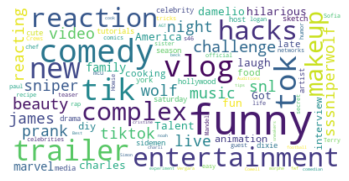

In [39]:
#reference: https://www.datacamp.com/community/tutorials/wordcloud-python
wordcloud = WordCloud(collocations=False, background_color = 'white', max_font_size = 50).generate(string)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

Text(0, 0.5, 'Number of Views')

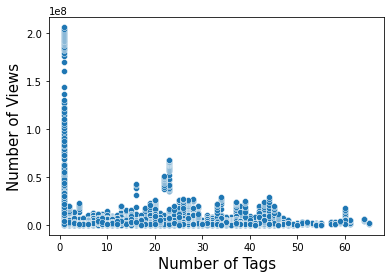

In [44]:
p = sns.scatterplot(data = entertainment, x = 'num_tags', y = 'view_count')
p.set_xlabel("Number of Tags", fontsize = 15)
p.set_ylabel("Number of Views", fontsize = 15)

### Are youtube video titles generally positive or negative sentiment? <a class="anchor" id="exploratoryanalysis6"></a>

- Used [this](https://realpython.com/python-nltk-sentiment-analysis/) resource for basic sentiment analysis

In [7]:
#use NLTK package for sentiment analysis
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mnakajim/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [9]:
entertainment['title'][0]

'I left youtube for a month and THIS is what happened.'

In [8]:
sia.polarity_scores(entertainment['title'][0])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [20]:
#try out for a few 
for i in range(0, 20): 
    print(entertainment['title'][i])
    print(sia.polarity_scores(entertainment['title'][i]))

I left youtube for a month and THIS is what happened.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
I Haven't Been Honest About My Injury.. Here's THE TRUTH
{'neg': 0.212, 'neu': 0.55, 'pos': 0.238, 'compound': 0.0852}
SURPRISING MY DAD WITH HIS DREAM TRUCK!! | Louie's Life
{'neg': 0.0, 'neu': 0.532, 'pos': 0.468, 'compound': 0.7311}
Kylie Jenner Reacts To 'WAP' Music Video Backlash
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
EXTREME Game of Hide and Seek in my NEW HOUSE!!
{'neg': 0.202, 'neu': 0.798, 'pos': 0.0, 'compound': -0.3147}
Doing Doja Cat’s Makeup!!
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Beerus VS Sailor Galaxia (Dragon Ball VS Sailor Moon) | DEATH BATTLE!
{'neg': 0.479, 'neu': 0.521, 'pos': 0.0, 'compound': -0.8503}
I Spent $1,000,000 On Lottery Tickets and WON
{'neg': 0.0, 'neu': 0.575, 'pos': 0.425, 'compound': 0.6633}
Cardi B Defends Kylie Jenner In 'WAP' Music Video As Fans Make Petition For Her Removal | PeopleTV
{'neg': 0.0, 'neu': 1.0,

- Some of the results I don't really agree with  
- Noticing that things that seem really intense, like in all caps, get put as neutral sometimes. 

In [8]:
entertainment['sentiment_neg'] = entertainment['title'].apply(lambda x: sia.polarity_scores(x)['neg'])
entertainment['sentiment_pos'] = entertainment['title'].apply(lambda x: sia.polarity_scores(x)['pos'])

In [17]:
entertainment.head()

,index,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,...,dislikes,comment_count,comments_disabled,ratings_disabled,description,categoryTitle,time_to_trend,num_tags,sentiment_neg,sentiment_pos
0,2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12 00:00:00+00:00,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,...,2628,40221,False,False,I left youtube for a month and this is what ha...,Entertainment,7.431667,30,0.000,0.000
1,5,w-aidBdvZo8,I Haven't Been Honest About My Injury.. Here's...,2020-08-11 20:00:04+00:00,UC5zJwsFtEs9WYe3A76p7xIA,Professor Live,24,2020-08-12 00:00:00+00:00,Professor injury|professor achilles|professor ...,949491,...,746,7506,False,False,Subscribe To My Channel - https://www.youtube....,Entertainment,3.998889,6,0.212,0.238
2,8,SnsPZj91R7E,SURPRISING MY DAD WITH HIS DREAM TRUCK!! | Lou...,2020-08-10 22:26:59+00:00,UCZDdF_p-L88NWVpzF0vjvMQ,Louie's Life,24,2020-08-12 00:00:00+00:00,surprising|dad|father|papa|with|dream|car|truc...,1402687,...,2158,6613,False,False,"Since I was little, i've had these goals for m...",Entertainment,1.550278,44,0.000,0.468
3,16,6TIsR_7nrNc,Kylie Jenner Reacts To 'WAP' Music Video Backlash,2020-08-10 18:41:19+00:00,UC2rJLq19N0dGrxfib80M_fg,HollywoodLife,24,2020-08-12 00:00:00+00:00,kylie jenner|kendall jenner|cardi b|wap|reacts...,1007540,...,7932,2763,False,False,Kylie Jenner dissed over cameo in Cardi B and ...,Entertainment,5.311389,9,0.000,0.000
4,22,FopIxceEr8g,EXTREME Game of Hide and Seek in my NEW HOUSE!!,2020-08-10 17:09:53+00:00,UCilwZiBBfI9X6yiZRzWty8Q,FaZe Rug,24,2020-08-12 00:00:00+00:00,faze rug|rug|rugfaze|fazerug|hide n seek|hide ...,3061467,...,2646,14934,False,False,THIS WAS SO MUCH FUNWe played hide n seek for ...,Entertainment,6.835278,16,0.202,0.000


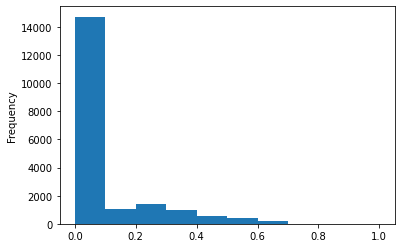

In [18]:
entertainment.sentiment_neg.plot(kind='hist');

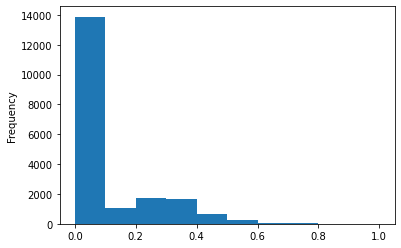

In [19]:
entertainment.sentiment_pos.plot(kind = 'hist');

In [189]:
#look at the videos with highest number of trending days
trending_info['sentiment_neg'] = trending_info['title'].apply(lambda x: sia.polarity_scores(x)['neg'])
trending_info['sentiment_pos'] = trending_info['title'].apply(lambda x: sia.polarity_scores(x)['pos'])

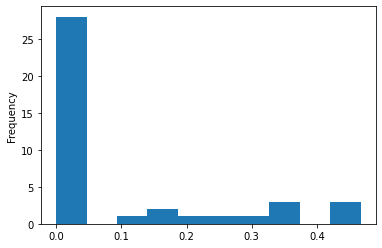

In [190]:
trending_info.sentiment_neg.plot(kind = 'hist');

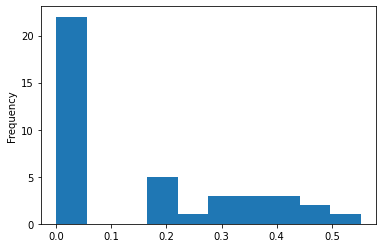

In [191]:
trending_info.sentiment_pos.plot(kind = 'hist');

In [193]:
trending_info[['title', 'sentiment_neg', 'sentiment_pos']]

,title,sentiment_neg,sentiment_pos
0,Turn into orbeez - Tutorial #Shorts,0.000,0.000
1,Turn into orbeez - Tutorial #Shorts,0.000,0.000
2,Floyd Mayweather vs Logan Paul: Fight goes the...,0.167,0.000
3,Israeli Iron Dome filmed intercepting rockets ...,0.000,0.000
4,"India claim stunning series win, end Australia...",0.000,0.368
5,Golden Buzzer: 9-Year-Old Victory Brinker Make...,0.000,0.219
6,Highlights: Manchester United 0-5 Liverpool | ...,0.000,0.328
7,Justin Bieber - Holy ft. Chance The Rapper,0.000,0.250
8,SPIDER-MAN: NO WAY HOME - Official Teaser Trai...,0.451,0.000
9,FIGHT HIGHLIGHTS | Anthony Joshua vs. Oleksand...,0.357,0.000


### Does attributes of video titles and tags affect views? <a class="anchor" id="exploratoryanalysis7"></a>

In [102]:
joined.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,categoryTitle,time_to_trend,num_tags
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12 00:00:00+00:00,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs,4.662778,15
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12 00:00:00+00:00,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,False,False,"While running her own modding shop, Ramya Pare...",Gaming,6.997222,25
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12 00:00:00+00:00,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,False,False,I left youtube for a month and this is what ha...,Entertainment,7.431667,30
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12 00:00:00+00:00,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,Music,7.351389,23
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12 00:00:00+00:00,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,False,False,Transforming The LaBrant Family's empty white ...,Howto & Style,8.831944,33


In [9]:
#add a column for how many capital letters are being used in the title 
entertainment['percent_caps'] = entertainment['title'].apply(lambda x: sum(1 for c in x if c.isupper())/len(x))
entertainment['contains_all_caps'] = entertainment['percent_caps'].apply(lambda x: 1 if x > 0.45 else 0)

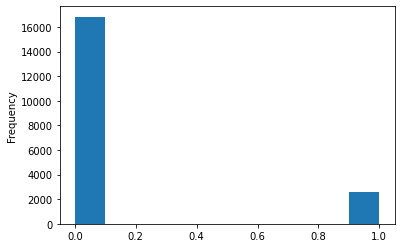

In [93]:
entertainment.contains_all_caps.plot(kind = 'hist');

In [62]:
tag_count.head(11)

,count
[None],3117
funny,1994
comedy,1188
reaction,805
vlog,764
challenge,646
reacting,527
sssniperwolf,498
sniper wolf,498
trailer,495


In [64]:
#add columns for if tags contains one of the tags that are most common 
entertainment['contains_funny'] = entertainment['tags'].apply(lambda x: 1 if 'funny' in x else 0)
entertainment['contains_comedy'] = entertainment['tags'].apply(lambda x: 1 if 'comedy' in x else 0)
entertainment['contains_reaction'] = entertainment['tags'].apply(lambda x: 1 if 'reaction' in x else 0)
entertainment['contains_vlog'] = entertainment['tags'].apply(lambda x: 1 if 'vlog' in x else 0)
entertainment['contains_reacting'] = entertainment['tags'].apply(lambda x: 1 if 'reacting' in x else 0)
entertainment['contains_challenge'] = entertainment['tags'].apply(lambda x: 1 if 'challenge' in x else 0)
entertainment['contains_sssniperwolf'] = entertainment['tags'].apply(lambda x: 1 if 'sssniperwolf' in x else 0)
entertainment['contains_sniperwolf'] = entertainment['tags'].apply(lambda x: 1 if 'sniper wolf' in x else 0)
entertainment['contains_trailer'] = entertainment['tags'].apply(lambda x: 1 if 'trailer' in x else 0)
entertainment['contains_tiktok'] = entertainment['tags'].apply(lambda x: 1 if 'tiktok' in x else 0)

In [65]:
subset_entertainment = entertainment[['view_count', 'num_tags', 'sentiment_neg', 'sentiment_pos', 'contains_all_caps', 'contains_funny', 'contains_comedy',
                                     'contains_reaction', 'contains_vlog', 'contains_reacting', 'contains_challenge', 'contains_sssniperwolf', 'contains_sniperwolf', 
                                     'contains_trailer', 'contains_tiktok']]

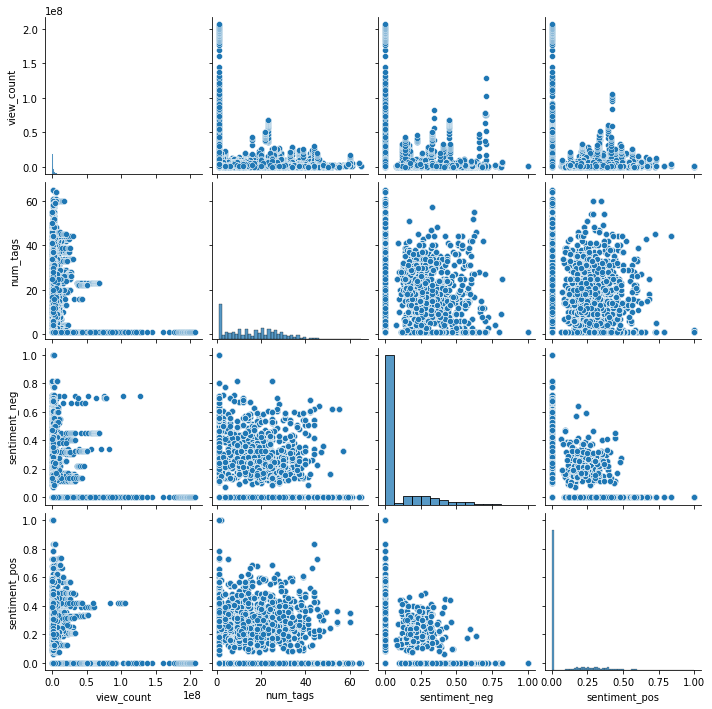

In [67]:
sns.pairplot(subset_entertainment[['view_count', 'num_tags', 'sentiment_neg', 'sentiment_pos']])

In [68]:
# check if we have missing values in subset_entertainment - looks like there are none
subset_entertainment.dropna().shape

(19419, 15)

In [69]:
subset_entertainment.shape

(19419, 15)

In [92]:
# try fitting a linear regression model

X = subset_entertainment.drop('view_count', axis = 1)
y = subset_entertainment['view_count']

#create test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 33)

#Instantiate model

lm_model = LinearRegression(normalize = True)
lm_model.fit(X_train, y_train) #Fit

#Predict and score the model 
y_test_preds = lm_model.predict(X_test)

#R-squared score
print(r2_score(y_test, y_test_preds))

0.02382544079870208


/Users/mnakajim/Documents/Github/youtube-analysis/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [88]:
import numpy as np
coefs = pd.DataFrame()
coefs['columns'] = X_train.columns
coefs['coefficients'] = lm_model.coef_
coefs['absolute'] = np.abs(coefs['coefficients'])

coefs.sort_values(by = 'absolute', ascending = False, inplace = True)

display(coefs)

,columns,coefficients,absolute
12,contains_trailer,2.693245e+06,2.693245e+06
6,contains_reaction,-1.943073e+06,1.943073e+06
4,contains_funny,1.225236e+06,1.225236e+06
3,contains_all_caps,-1.063497e+06,1.063497e+06
7,contains_vlog,-9.566284e+05,9.566284e+05
11,contains_sniperwolf,9.163958e+05,9.163958e+05
10,contains_sssniperwolf,9.163958e+05,9.163958e+05
5,contains_comedy,-6.763247e+05,6.763247e+05
9,contains_challenge,-5.608413e+05,5.608413e+05
2,sentiment_pos,5.198447e+05,5.198447e+05


This is a very bad fit. What if we take out neutral titles?

In [71]:
non_neutral = subset_entertainment[(subset_entertainment['sentiment_neg'] != 0) | (subset_entertainment['sentiment_pos'] != 0)]

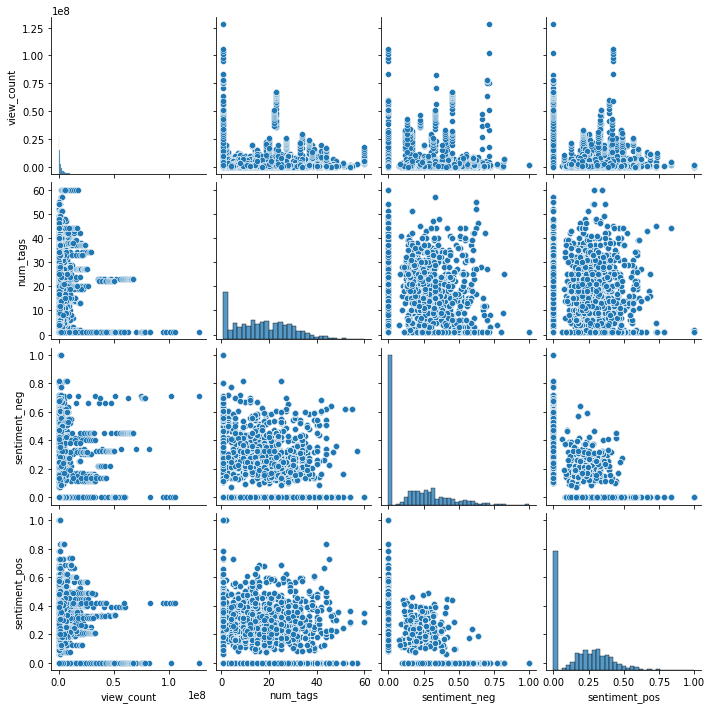

In [72]:
sns.pairplot(non_neutral[['view_count', 'num_tags', 'sentiment_neg', 'sentiment_pos']])

In [73]:
non_neutral.head()

,view_count,num_tags,sentiment_neg,sentiment_pos,contains_all_caps,contains_funny,contains_comedy,contains_reaction,contains_vlog,contains_reacting,contains_challenge,contains_sssniperwolf,contains_sniperwolf,contains_trailer,contains_tiktok
1,949491,6,0.212,0.238,0,0,0,0,0,0,0,0,0,0,0
2,1402687,44,0.000,0.468,1,0,0,0,1,0,0,0,0,0,0
4,3061467,16,0.202,0.000,0,0,0,0,0,0,0,0,0,0,0
6,1236984,37,0.479,0.000,0,0,0,0,0,0,0,0,0,0,0
7,21022916,1,0.000,0.425,0,0,0,0,0,0,0,0,0,0,0


In [74]:
# try fitting a linear regression model

X = non_neutral.drop('view_count', axis = 1)
y = non_neutral['view_count']

#create test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 33)

#Instantiate model

lm_model = LinearRegression(normalize = True)
lm_model.fit(X_train, y_train) #Fit

#Predict and score the model 
y_test_preds = lm_model.predict(X_test)

#R-squared score
print(r2_score(y_test, y_test_preds)

0.049650567577414484


/Users/mnakajim/Documents/Github/youtube-analysis/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [80]:

coefs = pd.DataFrame()
coefs['columns'] = X_train.columns
coefs['coefficients'] = lm_model.coef_
coefs['absolute'] = np.abs(coefs['coefficients'])

coefs.sort_values(by = 'absolute', ascending = False, inplace = True)

display(coefs)

,columns,coefficients,absolute
2,sentiment_pos,5.324776e+06,5.324776e+06
12,contains_trailer,4.724887e+06,4.724887e+06
1,sentiment_neg,4.710922e+06,4.710922e+06
6,contains_reaction,-2.710745e+06,2.710745e+06
5,contains_comedy,-2.076923e+06,2.076923e+06
4,contains_funny,1.652270e+06,1.652270e+06
11,contains_sniperwolf,1.354058e+06,1.354058e+06
10,contains_sssniperwolf,1.354058e+06,1.354058e+06
7,contains_vlog,-1.040346e+06,1.040346e+06
13,contains_tiktok,8.656853e+05,8.656853e+05


In [96]:
### Look at neutral videos

neutral = entertainment[(entertainment['sentiment_neg'] == 0) | (entertainment['sentiment_pos'] == 0)]

In [101]:
for title in neutral.title.head(30): 
    print(title)

I left youtube for a month and THIS is what happened.
SURPRISING MY DAD WITH HIS DREAM TRUCK!! | Louie's Life
Kylie Jenner Reacts To 'WAP' Music Video Backlash
EXTREME Game of Hide and Seek in my NEW HOUSE!!
Doing Doja Cat’s Makeup!!
Beerus VS Sailor Galaxia (Dragon Ball VS Sailor Moon) | DEATH BATTLE!
I Spent $1,000,000 On Lottery Tickets and WON
Cardi B Defends Kylie Jenner In 'WAP' Music Video As Fans Make Petition For Her Removal | PeopleTV
THE OFFICIAL REVEAL OF MY NEW $10,000,000 HOUSE! (Full Tour)
Watching Movie Trailers... Then Guessing Their Review Scores
ALREADY | Black Is King | Aliya Janell | Kany Diabate Choreography | Queens N Lettos
robot boyfriend
Binging with Babish: Paunch Burger from Parks & Rec
100k
Who Makes The BEST Hot Dog *Glizzy* 🌭
Meet Kohl (Date #3) | Brooklyn's 10 DATES in 10 DAYS
I SURPRISED HIM WITH HIS DREAM CAR!!
WE DID IT
Rich Brian & eaJ of DAY6 - LOVE IN MY POCKET ❤️
TREASURE – ‘BOY’ 0809 SBS Inkigayo
JEOPARDY: SIDEMEN EDITION
WHAT KSI SHOULD HAVE BOU